# Gibbs free energy of binary systems

---
This notebook interactively explores the variation in Gibbs free energy with temperature $T$ and composition $x$ for  a binary (A–B) system approximated as a regular solution.

As a start, two separate phases, i.e. liquid and solid, are considered.
It is assumed that each phase is maintaining the same structure, e.g. fcc for the solid, across the whole composition range.
Thus, the Gibbs free energy as a function of temperature needs to be specified for the pure (A or B) limits per phase.
Secondly, the difference in bonding energy (in terms of $\Omega$) parametrizes the regular solution assumption.


## Importing of necessary modules

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from ipywidgets import interact

%matplotlib notebook

## Ranges of composition and temperature

In [2]:
eps = 1e-10
x = np.linspace(eps,0.5,400)
x = np.concatenate((x,1-np.flip(x)[1:]))

T_range = (0,1000)
T = np.linspace(*T_range)

## Gibbs free energy of pure components

$G = H - TS$ of the pure components is simplified as a polynomial function $G(T) = a + b\,T^2 + c\,T^3$.
Hence, four parameter triplets characterize the behavior of liquid A, solid A, liquid B, and solid B.

In [3]:
def G(T,a=0,b=0,c=0):
    return a + b*T**2 + c*T**3

In [4]:
A_liq = (1200,-2e-4,-6e-6)
B_liq = (900,-8e-3,0)
A_sol = (-500,-1e-3,-3e-6)
B_sol = ( 500,-2e-3,0)

<IPython.core.display.Javascript object>


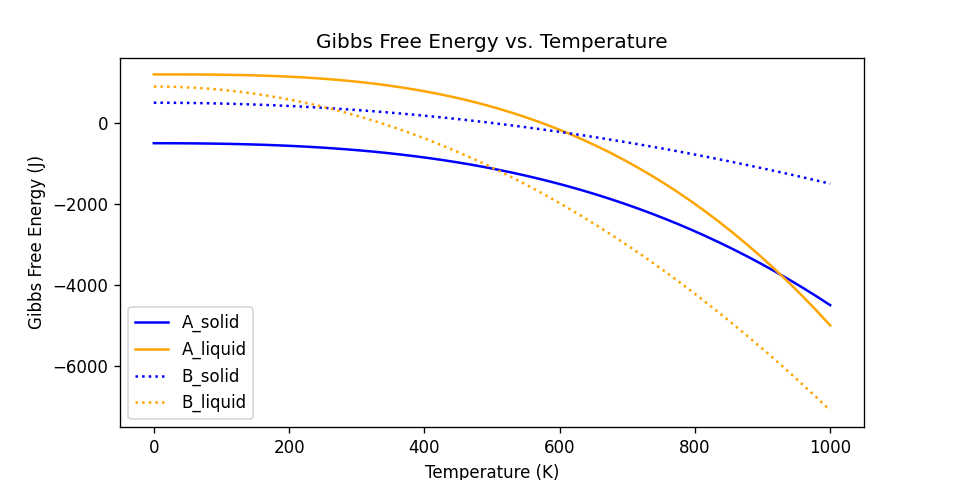

In [5]:
Gplot = plt.figure(figsize=(8,4))
ax_G = Gplot.add_subplot(1, 1, 1)
ax_G.plot(T,G(T,*A_sol),linestyle='solid',color='blue',label='A_solid')
ax_G.plot(T,G(T,*A_liq),linestyle='solid',color='orange',label='A_liquid')
ax_G.plot(T,G(T,*B_sol),linestyle='dotted',color='blue',label='B_solid')
ax_G.plot(T,G(T,*B_liq),linestyle='dotted',color='orange',label='B_liquid')

##
plt.title("Gibbs Free Energy vs. Temperature")
plt.xlabel("Temperature (K)")
plt.ylabel("Gibbs Free Energy (J)")
leg = plt.legend(loc='lower left')
##

Gplot.show()     

## Enthalpy of mixing

With the assumed regular solution behavior, the enthalpy of mixing follows as $\Delta H_\text{mix} = \Omega \, X_A \, X_B$.

The overall Gibbs free energy of the mixture is formulated as $G(T) = X_A\,G_A(T) + X_B\,G_B(T) + \Delta H_\text{mix} + R\,T\left(X_A \ln X_A + X_B \ln X_B\right)$.

In [6]:
def Gmix(A,A_args,
         B,B_args,
         Omega=0,
         T=300):
    return ( x       * A(T,*A_args)
            +  (1-x) * B(T,*B_args)
            +x*(1-x) * Omega
            +8.31*T  * (x*np.log(x) + (1-x)*np.log(1-x))
           )

In [7]:
Omega_liq = 0
Omega_sol = 0

<IPython.core.display.Javascript object>


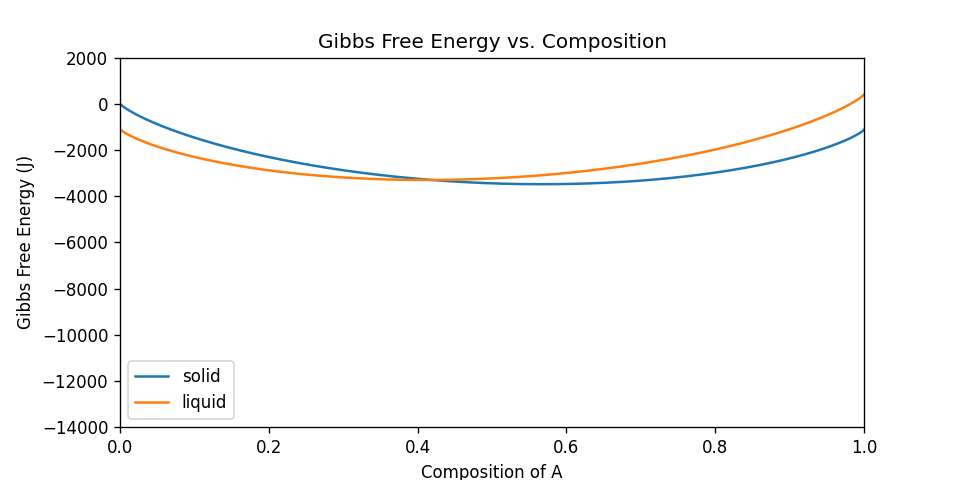

interactive(children=(IntSlider(value=500, description='T', max=1000, step=5), Output()), _dom_classes=('widge…

In [8]:
fig = plt.figure(figsize=(8,4))
ax = fig.add_subplot(1, 1, 1)
solid,  = ax.plot(x,np.zeros_like(x),
                  label='solid')
liquid, = ax.plot(x,np.zeros_like(x),
                  label='liquid')
plt.xlim([0,1])
plt.ylim([-14000,2000])

##
plt.title("Gibbs Free Energy vs. Composition")
plt.xlabel("Composition of A")
plt.ylabel("Gibbs Free Energy (J)")
leg = plt.legend(loc='lower left')
##

def update(T):
    
    solid.set_ydata(Gmix(G,A_sol,
                         G,B_sol,
                         Omega=Omega_sol,
                         T=T,
                      ))
    liquid.set_ydata(Gmix(G,A_liq,
                          G,B_liq,
                          Omega=Omega_liq,
                          T=T,
                      ))
    fig.canvas.draw_idle()
    
interact(update, T = T_range+(5,));